In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

%matplotlib inline
# Any results you write to the current directory are saved as output.

housing.csv



In [2]:
df = pd.read_csv('../input/housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f67dadc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f64704908>]], dtype=object)

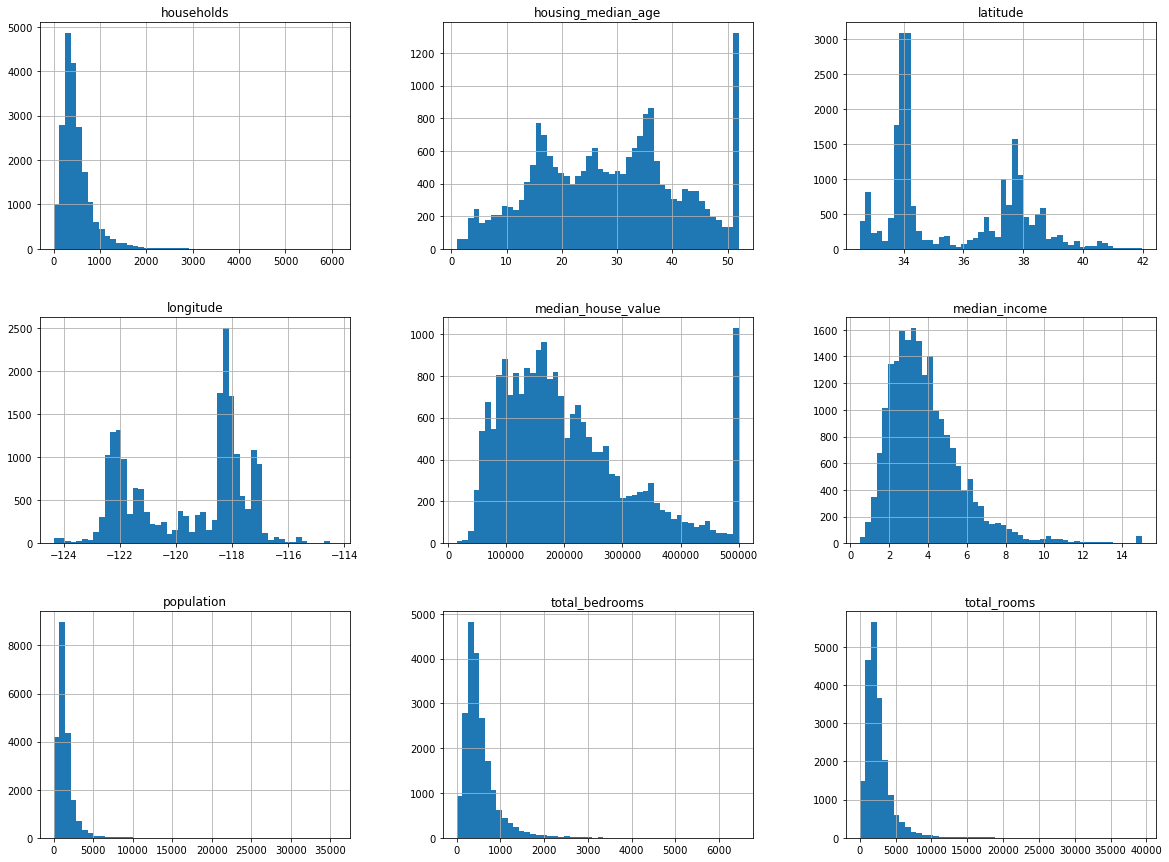

In [5]:
df.hist(bins=50, figsize=(20,15))

In [6]:
df_ori = df.copy()

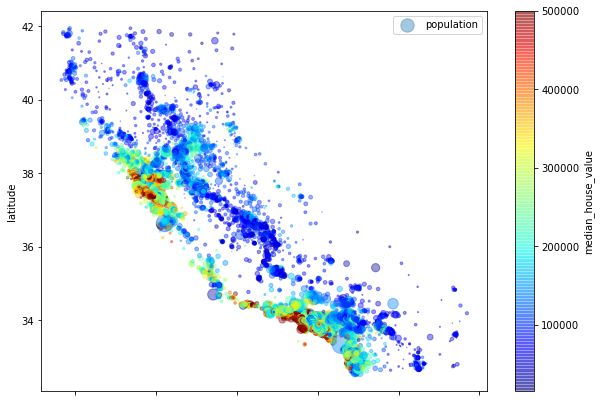

In [7]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
       s=df['population']/100, label='population', figsize=(10,7),
       c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [8]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f639f7e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2f60adee80>]], dtype=object)

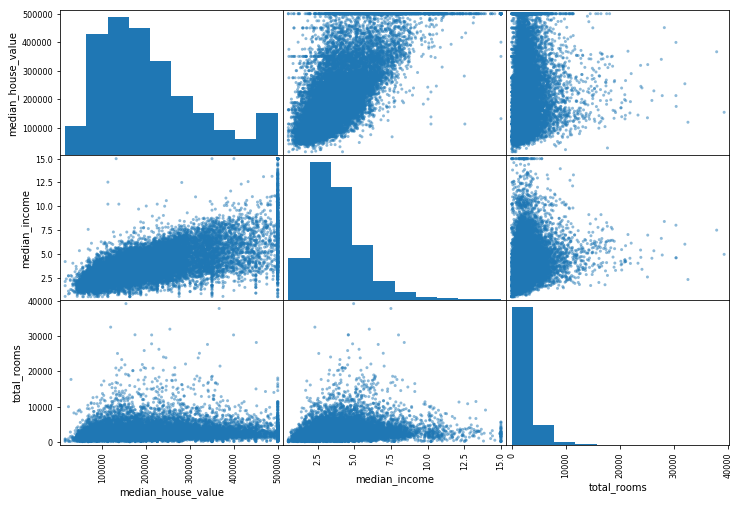

In [9]:
scatter_matrix(df[['median_house_value', 'median_income', 'total_rooms']], figsize=(12,8))

In [10]:
from sklearn.preprocessing import Imputer

In [11]:
imputer = Imputer(strategy='median')
df_numeric = df.drop('ocean_proximity', axis=1)
imputer.fit(df_numeric)
imputer.statistics_

array([ -1.18490000e+02,   3.42600000e+01,   2.90000000e+01,
         2.12700000e+03,   4.35000000e+02,   1.16600000e+03,
         4.09000000e+02,   3.53480000e+00,   1.79700000e+05])

In [12]:
df_numeric.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [13]:
tmp = imputer.transform(df_numeric)
df_imputed = pd.DataFrame(tmp, columns=df_numeric.columns)

Fil the NA with median Value usin Imputer Method

In [14]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


feature : 'ocean_proximity'  categorical -> one-hot encoding 

In [15]:
from sklearn.preprocessing import LabelBinarizer

ocean_proxi = df['ocean_proximity']
binary_encoder = LabelBinarizer()
ocean_one_hot = binary_encoder.fit_transform(ocean_proxi)
ocean_one_hot


array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [17]:
col_name = list(df)
col_name

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [18]:

class AddFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_p_room=True):
        self.add_bedroom_p_room=add_bedroom_p_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        room_id = int(np.where(np.array(col_name) == 'total_rooms')[0])
        household_id = int(np.where(np.array(col_name) == 'households')[0])
        population_id = int(np.where(np.array(col_name) == 'population')[0])
        bedroom_id = int(np.where(np.array(col_name) == 'total_bedrooms')[0])
        
        room_per_household = X[:,room_id]/X[:,household_id]
        population_per_household = X[:,population_id]/X[:,household_id]
        if self.add_bedroom_p_room:
            bedroom_per_room = X[:,bedroom_id]/X[:,room_id]
            return np.c_[X, room_per_household, population_per_household, bedroom_per_room]
        else:
            return np.c_[X, room_per_household, population_per_household]

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

num_features = col_name[:-2]
cat_features =  col_name[-1] # ['ocean_proximity']#

num_pipeline=Pipeline([
    ('selector', DataFrameSelector(num_features)),
    ('imputer', Imputer(strategy='median')),
    ('feature_add', AddFeatures()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_features)),
    ('cat_encoder', CategoricalEncoder()),
])

full_pipe = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [53]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_ori, test_size=0.2, random_state=42)

df_train = pd.DataFrame(train_set, columns=col_name)
labels = df_train['median_house_value'].values
df_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN


In [21]:

binary_encoder = LabelBinarizer()
binary_encoder.fit_transform(df_train[cat_features].values)


array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ..., 
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [63]:
ds = DataFrameSelector(cat_features)
ds.fit(df_train)
selected = ds.transform(df_train)
cat_en = LabelBinarizer()
cat_en.fit(selected)
X_train_cat = cat_en.transform(selected)
X_train_cat.shape


(16512, 5)

In [62]:
num_pipeline.fit(df_train)
X_train_num = num_pipeline.transform(df_train)
X_train_num.shape

(16512, 11)

In [66]:
X_train_colnames=num_features+['room_p_house', 'pop_p_house', 'bed_p_room']+list(cat_en.classes_)
X_train_colnames

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'room_p_house',
 'pop_p_house',
 'bed_p_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [69]:
X_train = pd.DataFrame(np.c_[X_train_num, X_train_cat], columns=X_train_colnames)
y_train = labels
X_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,room_p_house,pop_p_house,bed_p_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [82]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30,50,100], 'max_features': [4, 6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [10, 30, 50], 'max_features': [ 4, 6, 8]},
  ]
clf = RandomForestRegressor()
grid_search=GridSearchCV(clf, param_grid, cv=5, scoring = 'neg_mean_squared_error')

In [83]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 30, 50, 100], 'max_features': [4, 6, 8, 10, 12]}, {'bootstrap': [False], 'n_estimators': [10, 30, 50], 'max_features': [4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [87]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print (np.sqrt(-mean_score), params)

52221.98602 {'max_features': 4, 'n_estimators': 10}
50433.7866562 {'max_features': 4, 'n_estimators': 30}
49908.8066107 {'max_features': 4, 'n_estimators': 50}
49428.5680778 {'max_features': 4, 'n_estimators': 100}
51950.9198389 {'max_features': 6, 'n_estimators': 10}
49512.2830898 {'max_features': 6, 'n_estimators': 30}
49382.2276537 {'max_features': 6, 'n_estimators': 50}
49162.7914055 {'max_features': 6, 'n_estimators': 100}
52203.54993 {'max_features': 8, 'n_estimators': 10}
49973.8749796 {'max_features': 8, 'n_estimators': 30}
49610.7966808 {'max_features': 8, 'n_estimators': 50}
49301.0405426 {'max_features': 8, 'n_estimators': 100}
52197.1812228 {'max_features': 10, 'n_estimators': 10}
50338.5694738 {'max_features': 10, 'n_estimators': 30}
50059.1571107 {'max_features': 10, 'n_estimators': 50}
49541.3368756 {'max_features': 10, 'n_estimators': 100}
52430.9608273 {'max_features': 12, 'n_estimators': 10}
50518.7802214 {'max_features': 12, 'n_estimators': 30}
50120.5727623 {'max_fe

In [88]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.2772832353736957, 'median_income'),
 (0.13735546265362494, 'INLAND'),
 (0.097830065517425985, 'pop_p_house'),
 (0.089656734168206687, 'bed_p_room'),
 (0.086482844612804144, 'longitude'),
 (0.073389637607371994, 'latitude'),
 (0.067876473584069882, 'room_p_house'),
 (0.040391944641306715, 'housing_median_age'),
 (0.026010953078931913, '<1H OCEAN'),
 (0.024013271846636441, 'total_rooms'),
 (0.022797710832422092, 'population'),
 (0.018609998826663633, 'total_bedrooms'),
 (0.018344153175959398, 'households'),
 (0.012067615614552711, 'NEAR OCEAN'),
 (0.0076780413149913074, 'NEAR BAY'),
 (0.00021185715133653873, 'ISLAND')]